## Kaggle score: 18322 (The lower the better)

# Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,auc,roc_curve,confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
train = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/train_fe_v0.csv')
test = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/test_fe_v0.csv')

# Fit model

# Define predictors and target

In [3]:
# Converto to numpy
x_columns = train.columns.drop(['SalePrice','Unnamed: 0' ])
x = train[x_columns].values
y = train['SalePrice'].values


## Split data

In [4]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

# Model

In [5]:
model = Ridge(alpha=1)

model.fit(x_train,y_train)

Ridge(alpha=1)

In [6]:
y_pred = model.predict(x_test)
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [7]:
print(f'R2 = {round(R2,3)} and MAE = {round(MAE,3)}')

R2 = 0.847 and MAE = 21553.809


In [8]:
model.coef_

array([-46903.21759348,  -6175.20481978,  -4000.50067185,  -3324.47752378,
         9935.31618807,   4597.69364202,   2286.355713  ,  18035.28656434,
        43160.99785659,   6565.277859  ,    965.22741165,  63320.12939151,
        -1843.04166418, -53511.16617076, -23907.57470389,   -262.40362575,
        89149.91971588,  35444.41816421, -10616.32771525,  -2786.8442139 ,
        15286.0313672 ,  36812.70774692,  -1756.74506409,   9713.06059616,
        -3431.140882  ,  27438.02427466,  14035.87788479,  -4791.70509995,
          332.37436811,  28394.28048708, -14618.7561189 ,  22591.40197118,
        -4061.15463253,  26879.88953001,   8173.11962372,   2888.01548512,
       -13978.26277339,  20182.29287951,  10900.72750336,   8859.60026968,
        -1248.53208702, -12606.48023549,  57308.31364719,  36579.43405365,
        -2731.12455851,  60987.93499393,  22792.45310941,  -8065.83817321,
        15482.09965968,   8740.54136102, -38630.70272001, -25273.17788449,
        43888.47322583,  

## mean R2

0.7772687155279464


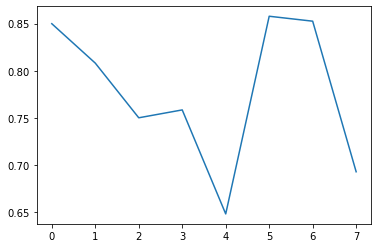

In [9]:
R2s = list()
MAEs = list()
for i in range(8):
    # Create train/test
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.2, random_state=i)
    # start model
    model = LinearRegression()
    # fit model
    model.fit(x_train,y_train)
    # predictions
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)
plt.plot(R2s)
print(np.mean(R2s))

# Making predictions

In [10]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,0.117647,0.50,0.255591,0.054322,1.0,1.0,0.000000,0.333333,...,0.25,0.0,0.0,0.5,0.75,0.000000,0.545455,502.5,0.5,0.8
1,1,1462,0.117647,0.75,0.258786,0.066685,1.0,1.0,0.333333,0.333333,...,0.00,0.0,0.0,1.0,0.50,0.806452,0.545455,502.5,0.5,0.8
2,2,1463,0.352941,0.75,0.236422,0.064643,1.0,1.0,0.333333,0.333333,...,0.00,0.0,0.0,0.5,0.75,0.000000,0.272727,502.5,0.5,0.8
3,3,1464,0.352941,0.75,0.249201,0.046638,1.0,1.0,0.333333,0.333333,...,0.00,0.0,0.0,1.0,0.75,0.000000,0.545455,502.5,0.5,0.8
4,4,1465,0.705882,0.75,0.137380,0.023394,1.0,1.0,0.333333,1.000000,...,0.30,0.0,0.0,1.0,0.75,0.000000,0.090909,502.5,0.5,0.8


In [11]:
x_ids = test['Id']
test_columns = test.columns.drop(['Unnamed: 0','Id'])
x_test_2 = test[test_columns].values

x_ids


0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [12]:
y_pred_2 = model.predict(x_test_2)

final=pd.DataFrame(data={'Id':x_ids,'SalePrice':y_pred_2})
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [13]:
# Run the code to save predictions in the format used for competition scoring

final.to_csv('submission_regression.csv',index=False)

# Submiting 